importing libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [2]:
df = pd.read_csv('ifood_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Data Exploration and Cleaning

In [3]:
print(df.isnull().sum())
print(df.describe())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

Descriptive Statistics

In [4]:
frequency_of_purchases = df['Recency']
mean_purchase_amount = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean(axis=1)

In [5]:
df['FrequencyOfPurchases'] = frequency_of_purchases
df['MeanPurchaseAmount'] = mean_purchase_amount

# Display the updated DataFrame
print(df[['Recency', 'FrequencyOfPurchases', 'MeanPurchaseAmount']])

      Recency  FrequencyOfPurchases  MeanPurchaseAmount
0          58                    58          269.500000
1          38                    38            4.500000
2          26                    26          129.333333
3          26                    26            8.833333
4          94                    94           70.333333
...       ...                   ...                 ...
2200       46                    46          223.500000
2201       56                    56           74.000000
2202       91                    91          206.833333
2203        8                     8          140.500000
2204       40                    40           28.666667

[2205 rows x 3 columns]


Customer Segmentation

In [6]:
X = df[['Recency', 'MeanPurchaseAmount']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (K) using elbow method or other techniques

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Display the updated DataFrame
print(df[['Recency', 'MeanPurchaseAmount', 'cluster']])

      Recency  MeanPurchaseAmount  cluster
0          58          269.500000        1
1          38            4.500000        2
2          26          129.333333        2
3          26            8.833333        2
4          94           70.333333        0
...       ...                 ...      ...
2200       46          223.500000        1
2201       56           74.000000        0
2202       91          206.833333        1
2203        8          140.500000        2
2204       40           28.666667        2

[2205 rows x 3 columns]


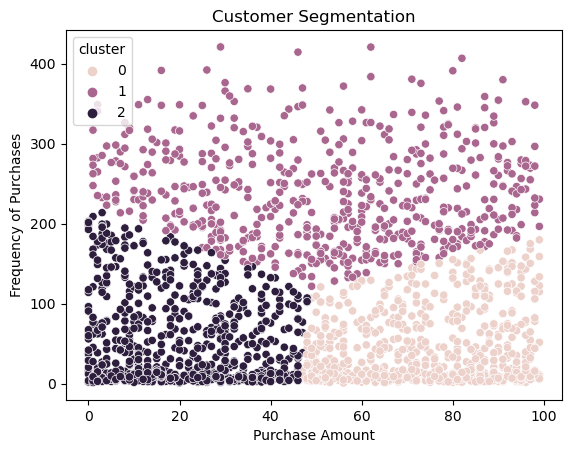

In [7]:
sns.scatterplot(x='Recency', y='MeanPurchaseAmount', hue='cluster', data=df)
plt.title('Customer Segmentation')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency of Purchases')
plt.show()

In [8]:
cluster_analysis = df.groupby('cluster').mean()

# Display insights and recommendations
print(cluster_analysis)

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
cluster                                                                       
0        41600.110687  0.628499  0.580153  73.601781  130.078880  11.264631   
1        73468.163233  0.060222  0.367670  53.006339  710.671949  59.134707   
2        44125.153553  0.562183  0.544416  21.277919  157.889594  15.293147   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
cluster                                                                     
0              54.591603        15.328244         11.764631     28.256997   
1             416.087163        85.207607         61.095087     79.282092   
2              74.940355        22.130711         15.253807     31.610406   

         ...  education_2n Cycle  education_Basic  education_Graduation  \
cluster  ...                                                              
0        ...            0.090331         0.036896              0.503